<a href="https://colab.research.google.com/github/Anikate-De/TensorFlow-Deep-Learning/blob/main/Convolutional%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision & Convolutional Neural Network

## What is Computer Vision

It refers to the practice of writing algorithms that can discover the patterns in visual data.

## What is a Convolutional Neural Network

A CNN (frequently used in this notebook) is a special kind of Neural Network that is built as a stack of Convolutional Layers and Pooling Layers. It specialises in classifying input into categories.

Convolutional Layer is the foundational unit of a CNN. The main difference between it and a Dense layer is that it forces the input values to share parameters and lets it use fewer parameters for training.

A Pooling Layer basically filters the data based on the weights, as in, only weights of considerable importance are allowed to pass through.

## Downloading our Dataset

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded data
zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()


--2023-03-13 21:13:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.4s    

2023-03-13 21:13:50 (19.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

Let's visualize the dataset to decide a way to write algorithms

In [2]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [3]:
# Let's list the number of files we would be working with

import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} files inside {dirpath}')

There are 2 directories and 0 files inside pizza_steak
There are 2 directories and 0 files inside pizza_steak/test
There are 0 directories and 250 files inside pizza_steak/test/pizza
There are 0 directories and 250 files inside pizza_steak/test/steak
There are 2 directories and 0 files inside pizza_steak/train
There are 0 directories and 750 files inside pizza_steak/train/pizza
There are 0 directories and 750 files inside pizza_steak/train/steak


In [4]:
# Get the class names programmatically (helpful for larger datasets)
import pathlib
import numpy as np
data_directory = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted(item.name for item in data_directory.glob('*')))
print(class_names)

['pizza' 'steak']


In [5]:
# Now let's visualize the images that we have

import matplotlib.pyplot as plt
import matplotlib.image as mpimp
import random

# Create a function to show random images
def view_random_images(target_dir, target_class, num_images = 1):
  target_folder = target_dir + target_class

  if (num_images > 10):
    print('A maximum of 10 images is allowed')
    num_images = 10

  # Get a random image path
  random_images = random.sample(os.listdir(target_folder), num_images)

  plt.figure(figsize = (18, 6))

  for index in range(len(random_images)):
    # Read the image using MatplotLib
    img = mpimp.imread(target_folder + '/' + random_images[index])
    plt.subplot(2, 5, index + 1)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

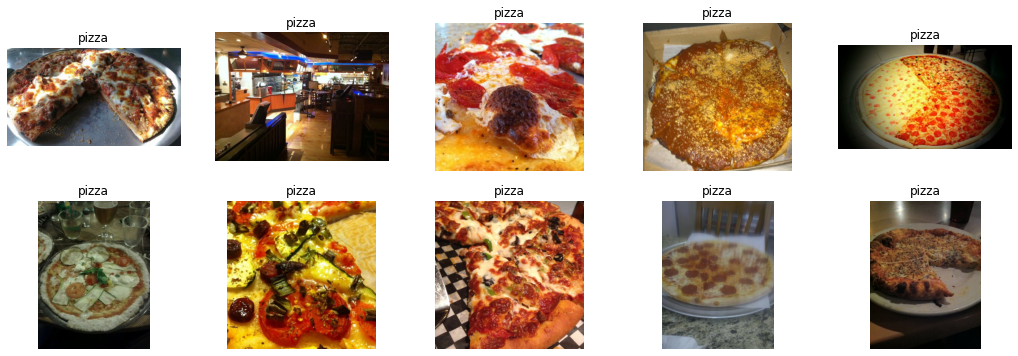

In [6]:
view_random_images(target_dir = 'pizza_steak/train/', target_class = 'pizza', num_images = 10)

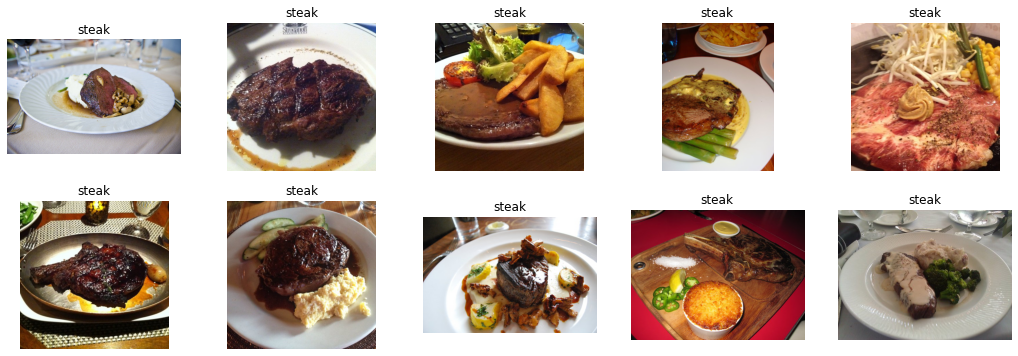

In [7]:
view_random_images(target_dir = 'pizza_steak/train/', target_class = 'steak', num_images = 10)

## Building a CNN Model

In [8]:
# Step 1: Load & Pre-Process Images

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(4)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Import data and turn it into batches
train_data = train_datagen.flow_from_directory('pizza_steak/train',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 4)
test_data = test_datagen.flow_from_directory('pizza_steak/test',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 4)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# Step 2: Build the Model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 249ms/step - loss: 0.6829 - accuracy: 0.5647 - val_loss: 0.6144 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.5565 - accuracy: 0.7287 - val_loss: 0.3891 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4660 - accuracy: 0.7927 - val_loss: 0.3420 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4112 - accuracy: 0.8133 - val_loss: 0.3374 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3839 - accuracy: 0.8333 - val_loss: 0.3095 - val_accuracy: 0.8860
